In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cycler
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('df1.csv')
df

,year,vwretd,vwretx,vwRetd,vwRetx,rf,Rf,DP,DG
0,1926,0.098479,0.043034,1.098479,1.043034,0.0351,1.0351,0.053157,NaN
1,1927,0.328716,0.266477,1.328716,1.266477,0.0307,1.0307,0.049143,1.170843
2,1928,0.391397,0.337056,1.391397,1.337056,0.0317,1.0317,0.040642,1.105764
3,1929,-0.150955,-0.182395,0.849045,0.817605,0.0426,1.0426,0.038454,0.773579
4,1930,-0.289005,-0.321455,0.710995,0.678545,0.0303,1.0303,0.047823,0.843870
...,...,...,...,...,...,...,...,...,...
89,2015,-0.015995,-0.037069,0.984005,0.962931,0.0003,1.0003,0.021885,1.008804
90,2016,0.129461,0.104250,1.129461,1.104250,0.0023,1.0023,0.022831,1.151962
91,2017,0.209028,0.184488,1.209028,1.184488,0.0051,1.0051,0.020718,1.074860
92,2018,-0.061828,-0.081145,0.938172,0.918855,0.0132,1.0132,0.021023,0.932386


In [3]:
# Although in this analysis, DG1926=nan does not matter, Zhiwen suggests delete the observations where nan appears 
# and keep the sample balanced
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
df

,year,vwretd,vwretx,vwRetd,vwRetx,rf,Rf,DP,DG
0,1927,0.328716,0.266477,1.328716,1.266477,0.0307,1.0307,0.049143,1.170843
1,1928,0.391397,0.337056,1.391397,1.337056,0.0317,1.0317,0.040642,1.105764
2,1929,-0.150955,-0.182395,0.849045,0.817605,0.0426,1.0426,0.038454,0.773579
3,1930,-0.289005,-0.321455,0.710995,0.678545,0.0303,1.0303,0.047823,0.843870
4,1931,-0.443873,-0.476969,0.556127,0.523031,0.0148,1.0148,0.063277,0.692053
...,...,...,...,...,...,...,...,...,...
88,2015,-0.015995,-0.037069,0.984005,0.962931,0.0003,1.0003,0.021885,1.008804
89,2016,0.129461,0.104250,1.129461,1.104250,0.0023,1.0023,0.022831,1.151962
90,2017,0.209028,0.184488,1.209028,1.184488,0.0051,1.0051,0.020718,1.074860
91,2018,-0.061828,-0.081145,0.938172,0.918855,0.0132,1.0132,0.021023,0.932386


In [4]:
df['dp'] = np.log(df['DP'])
df['dg'] = np.log(df['DG'])
df['r'] = np.log(df['vwRetd'])

In [5]:
rho = np.exp(- df['dp'].mean()) / (1 + np.exp(- df['dp'].mean()))
rho

0.9669445703655455

In [6]:
df['dghat'] = df['r'] + rho * df['dp'] - df['dp'].shift(1)

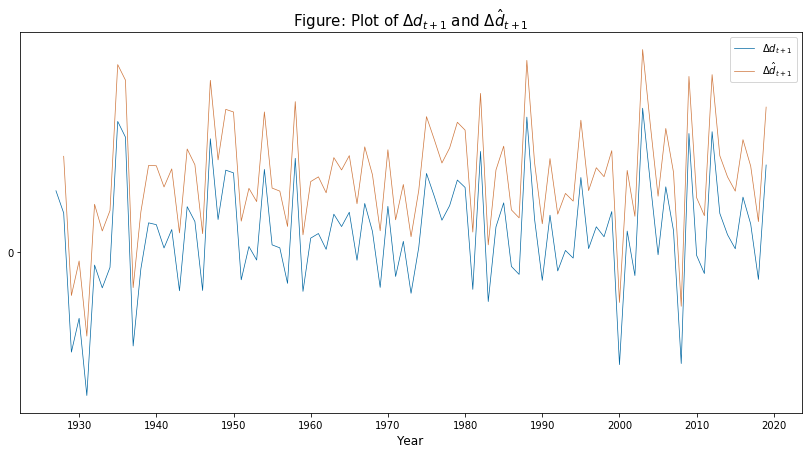

In [7]:
# ax will be an array of Axes objects
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#b85696', '#31686c', '#853c42']))

# Call plot() method on the appropriate object
ax.plot(df['year'], df['dg'], linewidth=0.7, label=r'$\Delta d_{t+1}$')
ax.plot(df['year'], df['dghat'], linewidth=0.7, label=r'$\Delta \hat{d}_{t+1}$')

ax.set_xlabel('Year', fontsize = 12)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(20))
ax.legend()
ax.set_title(r'Figure: Plot of $\Delta d_{t+1}$ and $\Delta \hat{d}_{t+1}$', fontsize = 15);

In [8]:
fig.savefig('q4fig1.pdf', format = 'pdf')

### VAR(1)

In [130]:
df

,year,vwretd,vwretx,vwRetd,vwRetx,rf,Rf,DP,DG,dp,dg,r,dghat
0,1927,0.328716,0.266477,1.328716,1.266477,0.0307,1.0307,0.049143,1.170843,-3.013012,0.157724,0.284213,NaN
1,1928,0.391397,0.337056,1.391397,1.337056,0.0317,1.0317,0.040642,1.105764,-3.202946,0.100536,0.330308,0.246249
2,1929,-0.150955,-0.182395,0.849045,0.817605,0.0426,1.0426,0.038454,0.773579,-3.258298,-0.256728,-0.163643,-0.111291
3,1930,-0.289005,-0.321455,0.710995,0.678545,0.0303,1.0303,0.047823,0.843870,-3.040250,-0.169756,-0.341090,-0.022545
4,1931,-0.443873,-0.476969,0.556127,0.523031,0.0148,1.0148,0.063277,0.692053,-2.760228,-0.368092,-0.586759,-0.215496
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2015,-0.015995,-0.037069,0.984005,0.962931,0.0003,1.0003,0.021885,1.008804,-3.821942,0.008766,-0.016124,0.156751
89,2016,0.129461,0.104250,1.129461,1.104250,0.0023,1.0023,0.022831,1.151962,-3.779641,0.141467,0.121741,0.288979
90,2017,0.209028,0.184488,1.209028,1.184488,0.0051,1.0051,0.020718,1.074860,-3.876761,0.072190,0.189817,0.220845
91,2018,-0.061828,-0.081145,0.938172,0.918855,0.0132,1.0132,0.021023,0.932386,-3.862143,-0.070008,-0.063822,0.078461


In [131]:
# Dependent variable (nparray)
Y = np.array(df.loc[1:, 'r'])[:, np.newaxis]
# Independent variables (nparray)
X = np.array(df.loc[:df.shape[0] - 2, ['r', 'dp']]) # .loc will include the tail!!!!!!!!!!
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result1 = model.fit()

In [132]:
print('b_r:', result1.params[1], '\n', 'b_dp:', result1.params[2], '\n', 'R^2:', result1.rsquared_adj)

b_r: 0.05115561005556342 
 b_dp: 0.08138266253216694 
 R^2: 0.01286710110600131


In [133]:
# Dependent variable (nparray)
Y = np.array(df.loc[1:, 'dp'])[:, np.newaxis]
# Independent variables (nparray)
X = np.array(df.loc[:df.shape[0] - 2, ['r', 'dp']]) # .loc will include the tail!!!!!!!!!!
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result2 = model.fit()

In [134]:
print('b_r:', result2.params[1], '\n', 'b_dp:', result2.params[2], '\n', 'R^2:', result2.rsquared_adj)

b_r: -0.21012145224145407 
 b_dp: 0.9410895904432759 
 R^2: 0.8921639155056266


In [135]:
A = np.array([[result1.params[1], result1.params[2]],
              [result2.params[1], result2.params[2]]])

In [136]:
print('standard error of conditional expected returns:', np.std(np.dot(np.array(df[['r', 'dp']]), A[0, :][:, np.newaxis])))

standard error of conditional expected returns: 0.03611504204230696


In [137]:
print('unconditional expected returns', np.mean(df['r']))

unconditional expected returns 0.09382855283852949


### Long-run regression

In [138]:
e1 = np.array([1, 0])
e1G = e1 @ np.linalg.inv(np.identity(2) - rho * A) @ A
print('e1G:',  e1G)

e1G: [-0.11747454  0.80137161]


In [139]:
e1 = np.array([1, 0])
e2 = np.array([0, 1])
ed = (e1 + rho * e2 - e2 @ np.linalg.inv(A))
edG = ed @ np.linalg.inv(np.identity(2) - rho * A) @ A
print('edG:',  edG)

edG: [-0.11747454 -0.19862839]


In [140]:
e1G - edG

array([-2.35922393e-16,  1.00000000e+00])

In [141]:
df['dpr'] = np.array(df[['r', 'dp']]) @ e1G[:, np.newaxis]
df['dpd'] = np.array(df[['r', 'dp']]) @ edG[:, np.newaxis]

In [142]:
print('std(dp):', np.std(df['dp']))
print('std(dpr):', np.std(df['dpr']))
print('std(dpd):', np.std(df['dpd']))
print('var(dpr)/var(dp):', np.var(df['dpr']) / np.var(df['dp']))
print('var(dpd)/var(dp):', np.var(df['dpd']) / np.var(df['dp']))

std(dp): 0.4322006598130496
std(dpr): 0.3481403581473866
std(dpd): 0.0878244651701465
var(dpr)/var(dp): 0.6488404135182875
var(dpd)/var(dp): 0.04129145403175612


In [143]:
print('cov(dpr, dpd):', '\n', np.cov(df['dpr'], df['dpd']))

cov(dpr, dpd): 
 [[ 0.12251912 -0.02925586]
 [-0.02925586  0.00779698]]


In [144]:
(np.var(df['dpr']) + np.var(df['dpd']) - 2 * np.cov(df['dpr'], df['dpd'])[0, 1]) / np.var(df['dp'])

1.0033681318744578

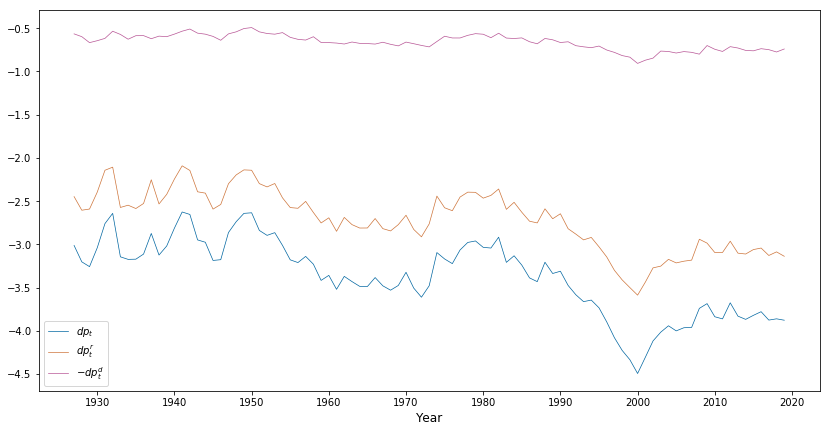

In [145]:
# ax will be an array of Axes objects
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#b85696', '#31686c', '#853c42']))

# Call plot() method on the appropriate object
ax.plot(df['year'], df['dp'], linewidth=0.7, label=r'$dp_t$')
ax.plot(df['year'], df['dpr'], linewidth=0.7, label=r'$dp^r_t$')
ax.plot(df['year'], - df['dpd'], linewidth=0.7, label=r'$-dp^d_t$')

ax.set_xlabel('Year', fontsize = 12)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.legend();

### More state variables

In [146]:
df = pd.read_csv('df2.csv')
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
df['dp'] = np.log(df['DP'])
df['dg'] = np.log(df['DG'])
df['r'] = np.log(df['vwRetd'])
df

,year,vwretd,vwretx,vwRetd,vwRetx,rf,Rf,DP,DG,cay,dp,dg,r
0,1952,0.133324,0.074015,1.133324,1.074015,0.0173,1.0173,0.055222,1.014585,0.022166,-2.896398,0.014479,0.125155
1,1953,0.003843,-0.050273,1.003843,0.949727,0.0209,1.0209,0.056981,0.979976,0.012191,-2.865045,-0.020227,0.003836
2,1954,0.504120,0.433636,1.504120,1.433636,0.0160,1.0160,0.049165,1.236983,0.025424,-3.012583,0.212675,0.408208
3,1955,0.254135,0.204040,1.254135,1.204040,0.0115,1.0115,0.041606,1.018926,0.019292,-3.179517,0.018749,0.226446
4,1956,0.085817,0.043745,1.085817,1.043745,0.0254,1.0254,0.040309,1.011206,-0.002524,-3.211188,0.011144,0.082333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2014,0.108363,0.085683,1.108363,1.085683,0.0007,1.0007,0.020890,1.045795,-0.017555,-3.868481,0.044777,0.102884
63,2015,-0.015995,-0.037069,0.984005,0.962931,0.0003,1.0003,0.021885,1.008804,-0.023502,-3.821942,0.008766,-0.016124
64,2016,0.129461,0.104250,1.129461,1.104250,0.0023,1.0023,0.022831,1.151962,-0.019028,-3.779641,0.141467,0.121741
65,2017,0.209028,0.184488,1.209028,1.184488,0.0051,1.0051,0.020718,1.074860,-0.024902,-3.876761,0.072190,0.189817


In [147]:
rho = np.exp(- df['dp'].mean()) / (1 + np.exp(- df['dp'].mean()))
rho

0.9715033814051754

In [148]:
# Dependent variable (nparray)
Y = np.array(df.loc[1:, 'r'])[:, np.newaxis]
# Independent variables (nparray)
X = np.array(df.loc[:df.shape[0] - 2, ['r', 'dp', 'cay']]) # .loc will include the tail!!!!!!!!!!
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result1 = model.fit()
print('b_r:', result1.params[1])
print('b_dp:', result1.params[2])
print('b_cay:', result1.params[3])
print('R^2:', result1.rsquared_adj)

b_r: -0.14260955720510804
b_dp: 0.14364163274813743
b_cay: 2.2382272328785393
R^2: 0.12963142731348798


In [149]:
# Dependent variable (nparray)
Y = np.array(df.loc[1:, 'dp'])[:, np.newaxis]
# Independent variables (nparray)
X = np.array(df.loc[:df.shape[0] - 2, ['r', 'dp', 'cay']]) # .loc will include the tail!!!!!!!!!!
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result2 = model.fit()
print('b_r:', result1.params[1])
print('b_dp:', result1.params[2])
print('b_cay:', result1.params[3])
print('R^2:', result1.rsquared_adj)

b_r: -0.14260955720510804
b_dp: 0.14364163274813743
b_cay: 2.2382272328785393
R^2: 0.12963142731348798


In [150]:
# Dependent variable (nparray)
Y = np.array(df.loc[1:, 'cay'])[:, np.newaxis]
# Independent variables (nparray)
X = np.array(df.loc[:df.shape[0] - 2, ['r', 'dp', 'cay']]) # .loc will include the tail!!!!!!!!!!
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result3 = model.fit()
print('b_r:', result1.params[1])
print('b_dp:', result1.params[2])
print('b_cay:', result1.params[3])
print('R^2:', result1.rsquared_adj)

b_r: -0.14260955720510804
b_dp: 0.14364163274813743
b_cay: 2.2382272328785393
R^2: 0.12963142731348798


In [151]:
A = np.array([[result1.params[1], result1.params[2], result1.params[3]],
              [result2.params[1], result2.params[2], result2.params[3]],
              [result3.params[1], result3.params[2], result3.params[3]]])

In [152]:
print('standard error of conditional expected returns:', np.std(np.dot(np.array(df[['r', 'dp', 'cay']]), A[0, :][:, np.newaxis])))

standard error of conditional expected returns: 0.069070995613242


In [153]:
print('unconditional expected returns', np.mean(df['r']))

unconditional expected returns 0.09962066285291157


In [154]:
e1 = np.array([1, 0, 0])
e1G = e1 @ np.linalg.inv(np.identity(3) - rho * A) @ A
print('e1G:',  e1G)

e1G: [-0.33540182  1.06685402  1.60183391]


In [155]:
e1 = np.array([1, 0, 0])
e2 = np.array([0, 1, 0])
ed = (e1 + rho * e2 - e2 @ np.linalg.inv(A))
edG = ed @ np.linalg.inv(np.identity(3) - rho * A) @ A
print('edG:',  edG)

edG: [-0.33540182  0.06685402  1.60183391]


In [156]:
e1G - edG

array([1.66533454e-16, 1.00000000e+00, 1.77635684e-15])

In [157]:
df['dpr'] = np.array(df[['r', 'dp', 'cay']]) @ e1G[:, np.newaxis]
df['dpd'] = np.array(df[['r', 'dp', 'cay']]) @ edG[:, np.newaxis]

In [158]:
print('std(dp):', np.std(df['dp']))
print('std(dpr):', np.std(df['dpr']))
print('std(dpd):', np.std(df['dpd']))
print('var(dpr)/var(dp):', np.var(df['dpr']) / np.var(df['dp']))
print('var(dpd)/var(dp):', np.var(df['dpd']) / np.var(df['dp']))

std(dp): 0.3830914570364833
std(dpr): 0.4067211729176514
std(dpd): 0.06383012967901584
var(dpr)/var(dp): 1.1271679409688622
var(dpd)/var(dp): 0.02776172953942275


In [159]:
print('cov(dpr, dpd):', '\n', np.cov(df['dpr'], df['dpd']))

cov(dpr, dpd): 
 [[0.16792851 0.01154092]
 [0.01154092 0.00413602]]


In [160]:
(np.var(df['dpr']) + np.var(df['dpd']) - 2 * np.cov(df['dpr'], df['dpd'])[0, 1]) / np.var(df['dp'])

0.997652580749873

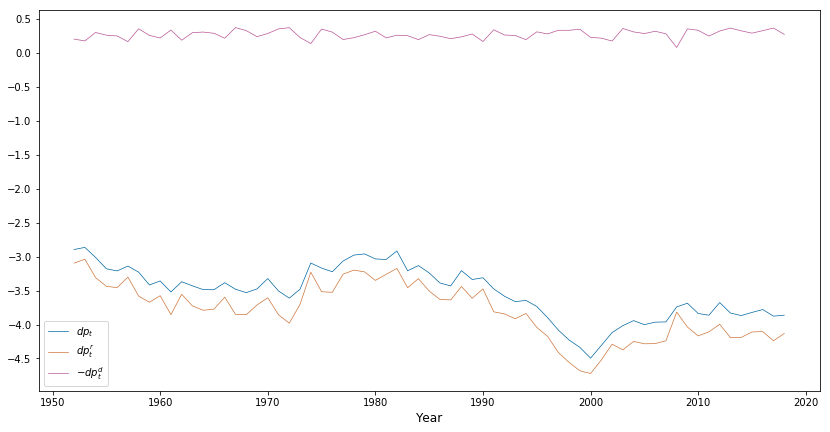

In [161]:
# ax will be an array of Axes objects
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#b85696', '#31686c', '#853c42']))

# Call plot() method on the appropriate object
ax.plot(df['year'], df['dp'], linewidth=0.7, label=r'$dp_t$')
ax.plot(df['year'], df['dpr'], linewidth=0.7, label=r'$dp^r_t$')
ax.plot(df['year'], - df['dpd'], linewidth=0.7, label=r'$-dp^d_t$')

ax.set_xlabel('Year', fontsize = 12)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.legend();